## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 64
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.RMSprop(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 5s 107us/step - loss: 0.6466 - acc: 0.7673 - val_loss: 1.8028 - val_acc: 0.4961
Epoch 50/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.6415 - acc: 0.7682 - val_loss: 1.8250 - val_acc: 0.4966


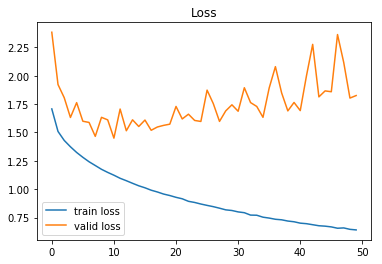

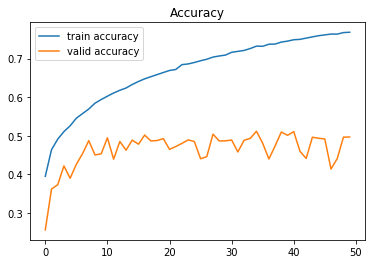

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [13]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 64
MOMENTUM = 0.95
Dropout_EXP = 0.25

In [18]:


def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [19]:
from keras.layers import Dropout
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
model.summary()
optimizer = keras.optimizers.RMSprop(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
__________

Epoch 47/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4358 - acc: 0.4890 - val_loss: 1.4723 - val_acc: 0.4757
Epoch 48/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4322 - acc: 0.4906 - val_loss: 1.3984 - val_acc: 0.4991
Epoch 49/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4247 - acc: 0.4945 - val_loss: 1.4696 - val_acc: 0.4681
Epoch 50/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.4281 - acc: 0.4928 - val_loss: 1.4918 - val_acc: 0.4646


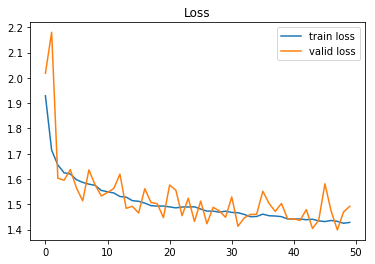

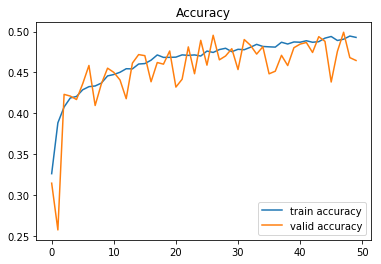

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# Regularization

In [46]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 64
MOMENTUM = 0.95
Dropout_EXP = 0.25
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [51]:
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4, drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [52]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256

50000/50000 [==============================] - 6s 116us/step - loss: 1.9629 - acc: 0.3349 - val_loss: 2.3338 - val_acc: 0.2158
Epoch 47/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.9459 - acc: 0.3430 - val_loss: 3.2434 - val_acc: 0.1388
Epoch 48/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.9622 - acc: 0.3382 - val_loss: 2.1034 - val_acc: 0.2981
Epoch 49/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.9581 - acc: 0.3369 - val_loss: 2.5423 - val_acc: 0.2093
Epoch 50/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.9581 - acc: 0.3384 - val_loss: 2.0459 - val_acc: 0.2761
Experiment with Regulizer = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (D

50000/50000 [==============================] - 6s 112us/step - loss: 1.5257 - acc: 0.4845 - val_loss: 1.6161 - val_acc: 0.4459
Epoch 42/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5177 - acc: 0.4863 - val_loss: 1.7123 - val_acc: 0.4160
Epoch 43/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5115 - acc: 0.4903 - val_loss: 1.5550 - val_acc: 0.4726
Epoch 44/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5106 - acc: 0.4893 - val_loss: 1.9317 - val_acc: 0.3525
Epoch 45/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5083 - acc: 0.4936 - val_loss: 1.7573 - val_acc: 0.3959
Epoch 46/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5073 - acc: 0.4927 - val_loss: 1.8255 - val_acc: 0.3892
Epoch 47/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5122 - acc: 0.4919 - val_loss: 1.6907 - val_acc: 0.4123
Epoch 48/50
50000/50000 [==============

50000/50000 [==============================] - 6s 116us/step - loss: 1.3430 - acc: 0.5238 - val_loss: 1.4504 - val_acc: 0.4804
Epoch 37/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.3317 - acc: 0.5274 - val_loss: 1.4893 - val_acc: 0.4680
Epoch 38/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.3311 - acc: 0.5260 - val_loss: 1.4355 - val_acc: 0.4991
Epoch 39/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.3234 - acc: 0.5306 - val_loss: 1.4318 - val_acc: 0.4864
Epoch 40/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.3203 - acc: 0.5289 - val_loss: 1.4150 - val_acc: 0.5001
Epoch 41/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.3192 - acc: 0.5343 - val_loss: 1.4625 - val_acc: 0.4776
Epoch 42/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.3145 - acc: 0.5340 - val_loss: 1.9154 - val_acc: 0.3065
Epoch 43/50
50000/50000 [==============

50000/50000 [==============================] - 6s 112us/step - loss: 1.3994 - acc: 0.5012 - val_loss: 1.4234 - val_acc: 0.4899
Epoch 32/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.3964 - acc: 0.5053 - val_loss: 1.4192 - val_acc: 0.4914
Epoch 33/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.3946 - acc: 0.5061 - val_loss: 1.5533 - val_acc: 0.4502
Epoch 34/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.3839 - acc: 0.5083 - val_loss: 1.4825 - val_acc: 0.4781
Epoch 35/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.3830 - acc: 0.5089 - val_loss: 1.4970 - val_acc: 0.4641
Epoch 36/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.3810 - acc: 0.5094 - val_loss: 1.4067 - val_acc: 0.4936
Epoch 37/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.3783 - acc: 0.5090 - val_loss: 1.4091 - val_acc: 0.4927
Epoch 38/50
50000/50000 [==============

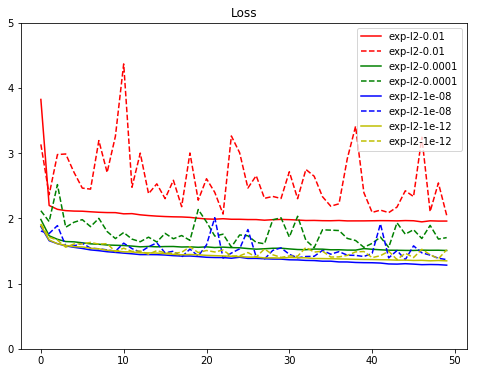

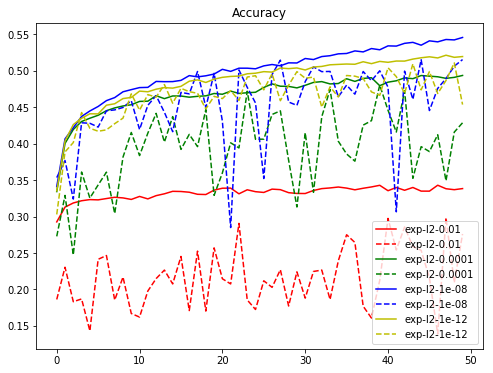

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()